# Análisis red de alimentos

In [1]:
# Importamos las librerías necesarias

%matplotlib inline
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

El conjunto de datos con los que trabajaremos está relacionado con la comida y las recetas. Y en concreto, la red de ingredientes. Tenemos un dataset que contiene:

- Las interacciones entre ingredientes. Dos ingredientes se enlazan si aparecen en una misma receta. Los pesos de la red corresponden al número de recetas en las que son necesarios los dos ingredientes.

En concreto tenemos un archivo con tres columnas separadas por comas: ingrediente1, ingrediente2, peso (número de recetas en las que aparecen los dos ingredientes).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Carga de los datos.</strong>
</div>
    
El archivo tiene la siguiente estructura: ingrediente1, ingrediente2, peso (número de recetas en las que aparecen los dos ingredientes).

Construiremos un único grafo no dirigido y pesado que contenga las relaciones del dataset.

Tenemos un grafo no dirigido con pesos, así que para cargarlo utilizaremos la función *read_weighted_edgelist()*.Utilizaremos "," como delimitador, ya que los ingredientes y pesos están separados por comas en el archivo CSV.

In [2]:
g = nx.read_weighted_edgelist('recipes.csv', delimiter=',', create_using=nx.Graph())

Veamos los nodos y aristas que se han cargado para comprobar que todo ha funcionado correctamente.

Mostramos sólo los diez primeros nodos para no llenar el archivo con esta visualización.

In [3]:
list(g.nodes())[0:10]

['chicken',
 'cinnamon',
 'onion',
 'ginger',
 'cane_molasses',
 'cumin',
 'garlic',
 'tamarind',
 'coriander',
 'vinegar']

Podemos comprobar los distintos ingredientes que representa cada nodo del grafo.

Mostramos ahora las aristas. Como hemos hecho con los nodos, mostraremos sólo las 10 primeras aristas.

In [4]:
list(g.edges(data=True))[0:10]

[('chicken', 'cinnamon', {'weight': 23.0}),
 ('chicken', 'onion', {'weight': 34.0}),
 ('chicken', 'tomato', {'weight': 4.0}),
 ('chicken', 'olive_oil', {'weight': 44.0}),
 ('chicken', 'vinegar', {'weight': 4.0}),
 ('chicken', 'black_pepper', {'weight': 23.0}),
 ('chicken', 'cayenne', {'weight': 11.0}),
 ('chicken', 'bean', {'weight': 3.0}),
 ('chicken', 'carrot', {'weight': 14.0}),
 ('chicken', 'nutmeg', {'weight': 3.0})]

Vemos las conexiones entre cada par de nodos y su peso.

Todo parece correcto, así que ahora pasamos a visualizar el grafo. Utilizaremos las funciones *spring_layout()* con el parámetro *seed* para conseguir siempre el mismo resultado y la función *draw_networkx()* para mostrar el grafo:

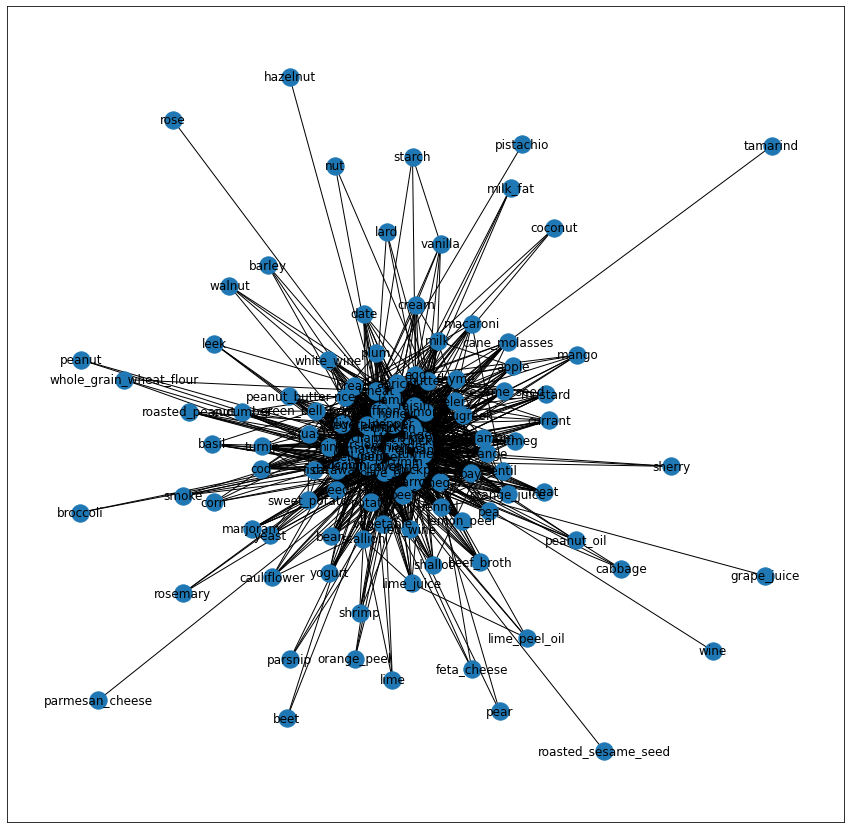

In [5]:
plt.figure(num=None, figsize=(15, 15))
pos = nx.spring_layout(g, seed=123)
nx.draw_networkx(g, pos=pos)

En esta visualización podemos ver que en los datos que hemos cargado hay un grupo de alimentos en el centro con muchas relaciones y algunos otros en los bordes como el pistacho o el brócoli que estarán presentes en pocas recetas.

Por defecto la función *nx.spring_layout()* calcula las posiciones de los nodos en el grafo con 50 iteraciones.

¿Habrá cambios significativos en este grafo si aumentamos el número de iteraciones?

Creamos un bucle para pintar 2 grafos con distinto número de iteraciones.

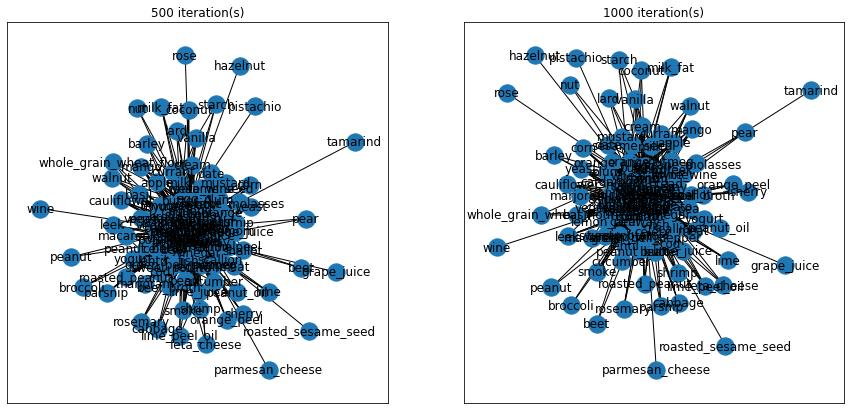

In [6]:
plt.figure(num=None, figsize=(15, 7))
iterations = [500, 1000]
for i, its in enumerate(iterations):
    ax = plt.subplot(1, 2, i+1)
    plt.title("{} iteration(s)".format(its))
    pos = nx.spring_layout(g, iterations=its, seed=123)
    nx.draw_networkx(g, pos=pos)

Con estos datos, el grafo resultante para un número de iteraciones bastante mayor como 500 y 1000 es muy similar al que habíamos obtenido anteriormente con las 50 iteraciones por defecto. Por tanto, en este caso, nos quedaremos con la visualización conseguida con 50 iteraciones, ya que el coste computacional es menor.

Por último, si nos resulta de interés podemos mostrar también el peso de los enlaces en el mismo grafo con la ayuda de la función *draw_networkx_edge_labels()*:

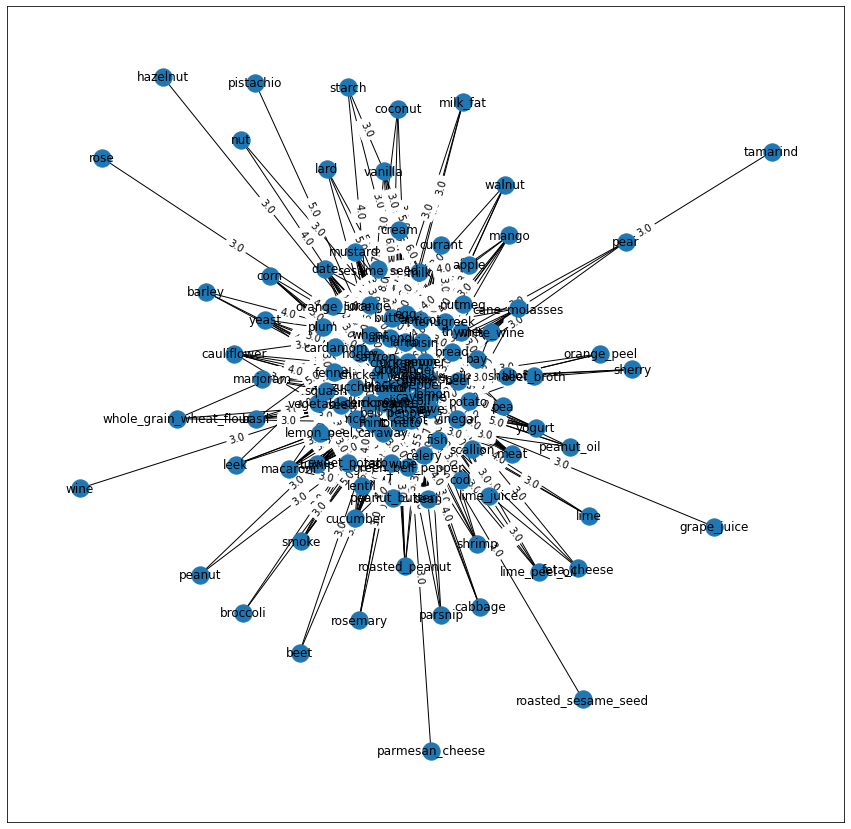

In [7]:
plt.figure(num=None, figsize=(15, 15))
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
nx.draw_networkx(g, pos=pos)

Podemos ver el peso en las aristas, pero con tantos nodos y tantas conexiones no es de gran utilidad para poder extraer información de forma visual.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis 1:</strong>
</div>

Una vez cargado el grafo, es momento de analizarlo. En primer lugar, indicaremos si existe algún ingrediente o grupo de ingredientes que queda aislado del resto. Para comprobarlo, podemos analizar las componentes del grafo.

En primer lugar utilizaremos la función *is_connected()* que nos devuelve True o False dependiendo de si todos sus nodos pertenecen al mismo componente o no.

In [8]:
nx.is_connected(g)

True

Nos ha devuelto True, lo que significa que tenemos un solo componente al que pertenecen todos los nodos.

También podríamos utilizar la función *number_connected_components()* para ver el número de componentes.

In [9]:
nx.number_connected_components(g)

1

Efectivamente, nos devuelve que sólo existe 1 componente. Por tanto, podemos decir que no hay ningún ingrediente o grupos de ingredientes aislados del resto.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis.</strong>
</div>

Para obtener el máximo y mínimo grado del grafo utilizaremos el uso de listas.

En primer lugar, mostraremos la lista ordenada de nodos por su grado.

In [10]:
lista_grados = list(g.degree)

# Mostramos a los 10 menores
sorted(lista_grados, key=lambda node: node[1])[0:10]

[('tamarind', 1),
 ('rose', 1),
 ('roasted_sesame_seed', 1),
 ('pistachio', 1),
 ('parmesan_cheese', 1),
 ('hazelnut', 1),
 ('grape_juice', 1),
 ('wine', 1),
 ('pear', 2),
 ('broccoli', 2)]

In [11]:
# Mostramos los 10 mayores
sorted(lista_grados, key=lambda node: node[1], reverse=True)[0:10]

[('olive_oil', 97),
 ('onion', 92),
 ('wheat', 83),
 ('garlic', 82),
 ('cumin', 81),
 ('cayenne', 73),
 ('cinnamon', 68),
 ('coriander', 68),
 ('tomato', 68),
 ('bell_pepper', 67)]

Viendo la lista ordenada comprobamos que el menor grado del nodo es 1. Tenemos varios nodos con este grado como son:
- tamarind
- rose
- roasted_sesame_seed
- pistachio
- parmesan_cheese
- hazelnut
- grape_juice
- wine

Por otro lado, el nodo con mayor grado es *olive_oil* con un valor de 97. No tenemos grandes conocimientos de la gastronomía Africana, pero sabemos que el aceite de oliva es básico en muchas preparaciones de todo el mundo, así que es lógico que el nodo con mayor grado sea este ingrediente.

También podemos obtener estos nodos con las funciones min() y max().

In [12]:
# Obtenemos el máximo y el mínimo por el valor del grado de cada nodo
grado_minimo = min(lista_grados, key=lambda nodo: nodo[1]) 
grado_maximo = max(lista_grados, key=lambda nodo: nodo[1])

print("Nodo con grado mínimo: ", grado_minimo)
print("Nodo con grado máximo: ", grado_maximo)

Nodo con grado mínimo:  ('tamarind', 1)
Nodo con grado máximo:  ('olive_oil', 97)


En este caso, para el nodo de grado mínimo nos ha mostrado sólo un elemento, el *tamarind*.

Para calcular la media, la mediana y el histograma tomaremos sólo el valor de los grados. Pero antes utilizamos la función *info()* y veamos la información general que nos proporciona del grafo:

In [13]:
print(nx.info(g))

Graph with 121 nodes and 1452 edges


Vemos que es un grafo con 121 nodos y 1452 aristas con un grado medio de 24.

Realizaremos nuestros cálculos para obtener la media, la mediana y el histograma.

In [14]:
# Obtenemos una lista de los grados ordenados de menor a mayor
degree_sequence = sorted([d for n, d in g.degree()])

# Obtenemos la media
mean_degree = np.mean(degree_sequence)
print("El grado medio se: ", mean_degree)

# Obtenemos la mediana
median_degree = np.median(degree_sequence)
print("La mediana es: ", median_degree)

El grado medio se:  24.0
La mediana es:  15.0


El grado medio calculado de esta forma coincide con el que habíamos obtenido con la función *info()*.

También podemos comprobar que existe cierta diferencia con la media y la mediana, así que los datos es muy probable que no sigan una distribución simétrica.

Calculamos el histograma:

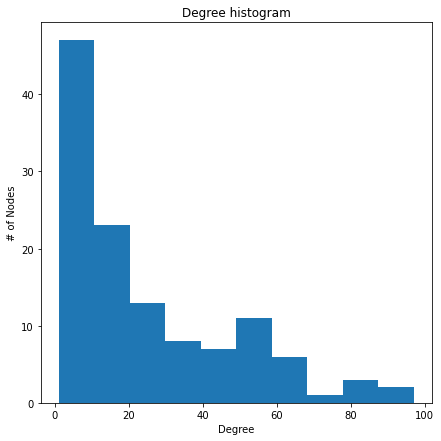

In [15]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.hist(degree_sequence)
ax.set_title("Degree histogram")
ax.set_xlabel("Degree")
ax.set_ylabel("# of Nodes")

plt.show()

Comprobamos que, en efecto, los grados de los nodos no siguen una distribución simétrica. Hay más nodos con menores grados que mayores. Esto indica que es más común encontrar ingredientes que se combinan con un número no muy elevado de otros ingredientes que encontrar ingredientes como el aceite de oliva que se utilizan en un gran número de recetas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis 2:</strong>
</div>

Aquí realizaremos un análisis de los ingredientes para determinar cuál o cuáles son los ingredientes que más fácilmente se combinan.

Para conocer los ingredientes que más fácilmente se combinan, podemos empezar analizando sus grados.

Veamos los 10 ingredientes con mayor grado:

In [16]:
sorted(lista_grados, key=lambda node: node[1], reverse=True)[0:10]

[('olive_oil', 97),
 ('onion', 92),
 ('wheat', 83),
 ('garlic', 82),
 ('cumin', 81),
 ('cayenne', 73),
 ('cinnamon', 68),
 ('coriander', 68),
 ('tomato', 68),
 ('bell_pepper', 67)]

También podemos llegar al mismo resultado utilizando la centralidad basada en el grado, que podemos calcular con la función *degree_centrality()*. Esta medida nos devolverá un valor entre 0 y 1 para cada nodo, 0 indicará que no está conectado a ningún otro nodo y 1 que está conectado al resto de nodos del grafo.

In [17]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[0:10]

[('olive_oil', 0.8083333333333333),
 ('onion', 0.7666666666666666),
 ('wheat', 0.6916666666666667),
 ('garlic', 0.6833333333333333),
 ('cumin', 0.675),
 ('cayenne', 0.6083333333333333),
 ('cinnamon', 0.5666666666666667),
 ('coriander', 0.5666666666666667),
 ('tomato', 0.5666666666666667),
 ('bell_pepper', 0.5583333333333333)]

Los 10 ingredientes con mayor centralidad son, como es lógico, los nodos con mayor grado. Esta medida nos ayuda a saber la importancia del nodo en el grafo.

Por tanto, sea con una manera u otra podemos ver que los 10 elementos que se combinan con más ingredientes distintos son:
- Aceite de oliva *(olive_oil)*
- Cebolla *(onion)*
- Trigo *(wheat)*
- Ajo *(garlic)*
- Comino *(cumin)*
- Cayena *(cayenne)*
- Canela *(cinnamon)*
- Cilantro *(coriander)*
- Tomate *(tomato)*
- Pimiento *(bell_pepper)*

Veamos que de estos 10 ingredientes, 4 son especias, las cuales es muy común utilizarlas en distintas preparaciones. También tenemos ingredientes básicos para cualquier sofrito como cebolla, ajo, tomate, pimiento o aceite. Y por último tenemos el trigo, el cual suponemos que será un ingrediente básico en la comida africana.

Mediante el grado del nodo podemos comprobar los ingredientes que se combinan con más ingredientes distintos, pero ¿qué ingredientes son los que más veces se relacionan entre sí?

Para contestar a esta pregunta nos ayudaremos también de una lista ordenada, pero en este caso será la lista de las aristas con su peso.

In [18]:
lista_aristas = list(g.edges(data=True))
sorted(lista_aristas, key=lambda node: node[2]['weight'], reverse=True)[0:10]

[('cumin', 'olive_oil', {'weight': 120.0}),
 ('garlic', 'olive_oil', {'weight': 106.0}),
 ('onion', 'cumin', {'weight': 94.0}),
 ('cumin', 'coriander', {'weight': 79.0}),
 ('olive_oil', 'bell_pepper', {'weight': 76.0}),
 ('onion', 'garlic', {'weight': 69.0}),
 ('cayenne', 'olive_oil', {'weight': 68.0}),
 ('cinnamon', 'olive_oil', {'weight': 65.0}),
 ('cumin', 'cayenne', {'weight': 63.0}),
 ('cinnamon', 'onion', {'weight': 59.0})]

Podemos ver que los ingredientes que más veces se relacionan entre sí coinciden con los 10 ingredientes mencionados anteriormente. Destaca la combinación del aceite de oliva y el comino que aparecen conjuntamente en 120 recetas. Parece que el comino es una especie bastante importante en la gastronomía Africana.

También podemos analizar si existe algún ingrediente que esté conectado a menos ingredientes que el top-10 que hemos visto, pero que aparezca en más recetas.

Para averiguarlo, utilizaremos la medida del grado del grafo ponderado por los pesos. Este grado se calcula como la suma de los pesos de las aristas que están conectadas al nodo.

Calculamos el grado ponderado y ordenamos el listado:

In [19]:
grados_ponderados = list(nx.degree(g, weight='weight'))
sorted(grados_ponderados, key=lambda node: node[1], reverse=True)[0:10]

[('olive_oil', 1528.0),
 ('onion', 1253.0),
 ('cumin', 1149.0),
 ('garlic', 1061.0),
 ('bell_pepper', 770.0),
 ('cayenne', 757.0),
 ('wheat', 742.0),
 ('coriander', 706.0),
 ('turmeric', 690.0),
 ('black_pepper', 662.0)]

El top-10 obtenido con esta medida es casi igual a excepción de *turmeric*, que es la cúrcuma. Este ingrediente ha entrado en el listado en detrimento del tomate. Esto indica que, aunque la cúrcuma combine con menos ingredientes que el tomate, se utiliza en mayor número de recetas.

## Conclusiones

Hemos visto cómo cargar un grafo a partir de un archivo CSV y cómo representarlo visualmente. Luego lo hemos analizado para descubrir las relaciones de los ingredientes entre sí, cómo: cuáles son los ingredientes que más se utilizan o cuáles se relacionan más entre sí. Hemos descubierto que al igual que en la gastronomía mediterránea, el aceite de oliva es también muy usado en la gastronomía africana.